                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          1.79e-139
Time:                        20:40:05   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9546      4.677     -3.839   

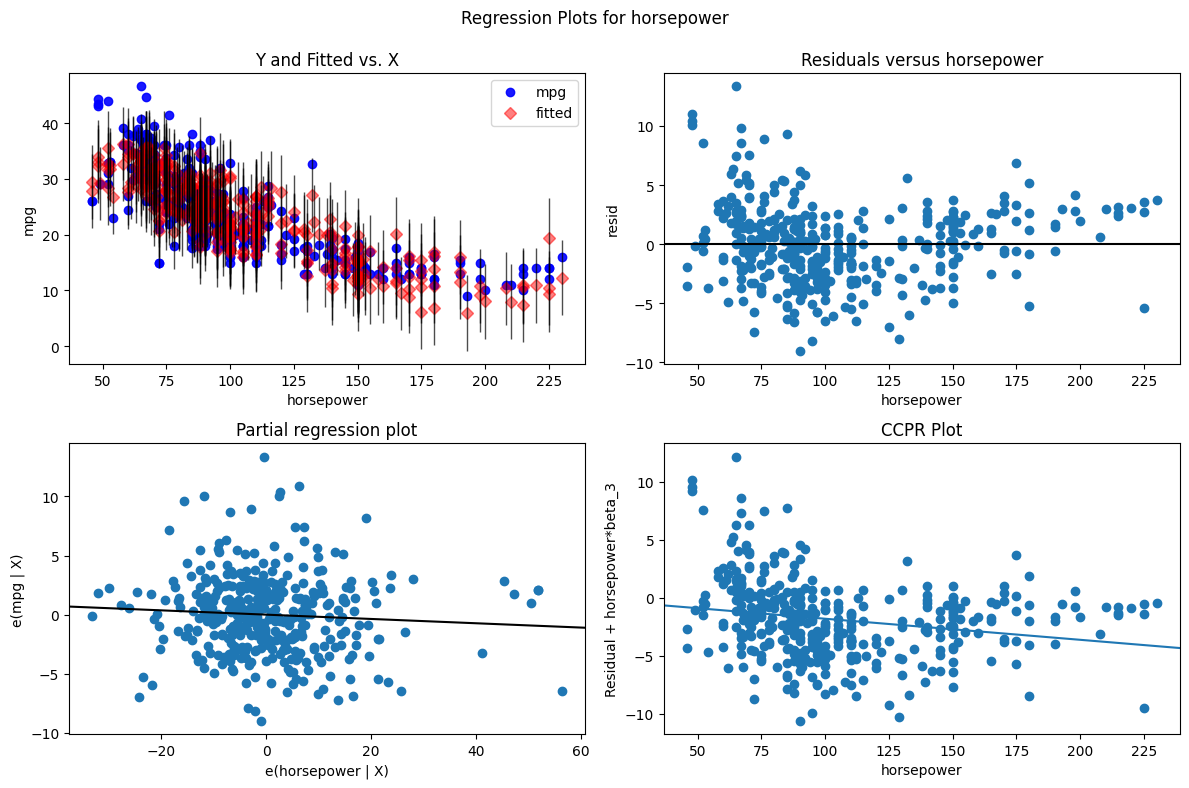

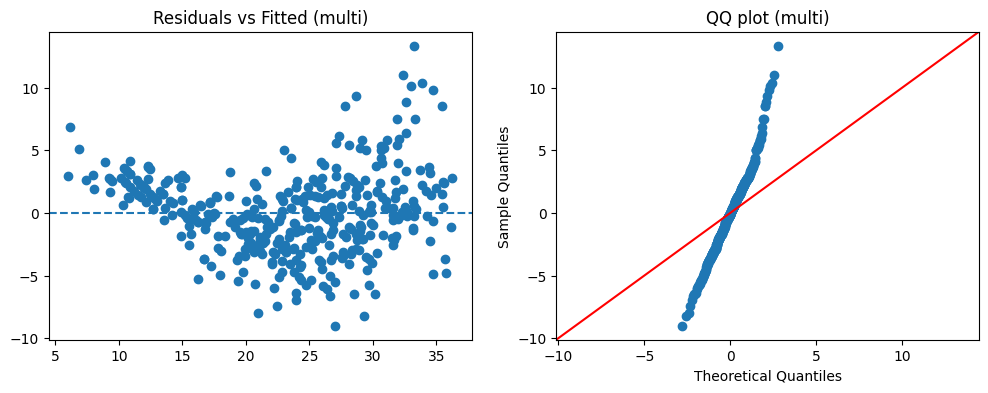

<Figure size 800x600 with 0 Axes>

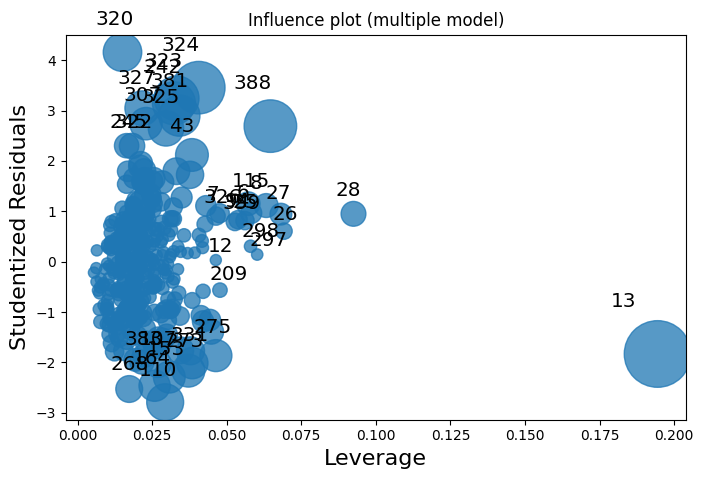

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     331.1
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          2.25e-158
Time:                        20:40:06   Log-Likelihood:                -978.81
No. Observations:                 392   AIC:                             1974.
Df Residuals:                     384   BIC:                             2005.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.7719      4.48

In [5]:
# %% [markdown]
# Task B: Multiple Linear Regression (Question 9) — Fixed version

# %%
# Prepare Auto dataset for multiple regression
Auto2 = Auto.copy()
# Convert 'origin' to categorical and get dummies
Auto2['origin'] = Auto2['origin'].astype('category')
Auto2 = pd.get_dummies(Auto2, columns=['origin'], drop_first=True)

# Define predictors (all numeric columns after dummy encoding)
predictors = ['cylinders','displacement','horsepower','weight','acceleration','year'] + \
             [c for c in Auto2.columns if c.startswith('origin_')]

# Construct X and y
X_multi = sm.add_constant(Auto2[predictors])
y = Auto2['mpg']

# Convert all columns to float to avoid object dtype issues
X_multi = X_multi.astype(float)
y = y.astype(float)

# Drop any remaining rows with NaN values
combined = pd.concat([y, X_multi], axis=1).dropna()
y = combined['mpg']
X_multi = combined.drop(columns=['mpg'])

# Fit multiple linear regression
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

# ANOVA vs intercept-only model
anova_results = anova_lm(sm.OLS(y, sm.add_constant(np.ones(len(y)))).fit(), model_multi)
print('\nANOVA comparison vs intercept-only model:')
print(anova_results)

# %%
# Diagnostic plots for multiple regression
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model_multi, 'horsepower', fig=fig)
plt.show()

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(model_multi.fittedvalues, model_multi.resid)
ax[0].axhline(0, linestyle='--')
ax[0].set_title('Residuals vs Fitted (multi)')
sm.qqplot(model_multi.resid, line='45', ax=ax[1])
ax[1].set_title('QQ plot (multi)')
plt.show()

fig = plt.figure(figsize=(8,6))
influence_plot(model_multi, criterion='cooks')
plt.title('Influence plot (multiple model)')
plt.show()

# %%
# (e) Interactions example: horsepower * weight
formula_inter = 'mpg ~ horsepower * weight + displacement + acceleration + cylinders + year'
model_inter = smf.ols(formula_inter, data=Auto).fit()
print(model_inter.summary())

# %%
# (f) Transformations: log(weight) and sqrt(displacement)
Auto_trans = Auto.copy()
Auto_trans['log_weight'] = np.log(Auto_trans['weight'])
Auto_trans['sqrt_disp'] = np.sqrt(Auto_trans['displacement'])
formula_trans = 'mpg ~ horsepower + log_weight + sqrt_disp + acceleration + cylinders + year'
model_trans = smf.ols(formula_trans, data=Auto_trans).fit()
print(model_trans.summary())

print('\nR-squared comparison:')
print('Simple model R2:', model_simple.rsquared)
print('Multiple model R2:', model_multi.rsquared)
print('Interaction model R2:', model_inter.rsquared)
print('Transformed model R2:', model_trans.rsquared)